Data Understanding

In [1]:
import plotly.express as px
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Selecting only certain columns to reduce memory usage
cols = ["price", "year", "odometer", "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
df = pd.read_csv('vehicles.csv', usecols=cols)
print(df.columns.tolist())
#Confirming that only important columns are included 

['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


The original dataset contained many columns such as id, VIN, etc that did not 
add value to price predictions. Due to extreme memory usage, decided to define a list
of columns most relevant to predicting price. 
Used uncols parameter to load only selected columns into df

In [3]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
obj_cols = df.select_dtypes(include = "object").columns
for c in obj_cols:
    df[c] = df[c].astype("category")
print(df.dtypes)

price              int64
year             float64
manufacturer    category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         426880 non-null  int64   
 1   year          425675 non-null  float64 
 2   manufacturer  409234 non-null  category
 3   condition     252776 non-null  category
 4   cylinders     249202 non-null  category
 5   fuel          423867 non-null  category
 6   odometer      422480 non-null  float64 
 7   title_status  418638 non-null  category
 8   transmission  424324 non-null  category
 9   drive         296313 non-null  category
 10  size          120519 non-null  category
 11  type          334022 non-null  category
 12  paint_color   296677 non-null  category
 13  state         426880 non-null  category
dtypes: category(11), float64(2), int64(1)
memory usage: 14.3 MB


,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [6]:
#Checking missing values 
print(df.isna().sum())

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


Data Prep

Data Preparation

In [8]:
#Filtering price column
df = df[(df['price'] >= 100) & (df['price'] <=100000)]

In [9]:
#Handling missing values - Numerical columns will use the median 
df['year']= df['year'].fillna(df['year'].median())
df['odometer']= df['odometer'].fillna(df['odometer'].median())

In [10]:
#Handling missing values - Categorical variables - adding unknown 
categoricals_na = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in categoricals_na:
    df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')

In [11]:
#Confirming that it worked 
print(df[categoricals_na].isna().sum())

manufacturer    0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


In [12]:
#Downcasting numeric columns for memory usage 
df['price']= df['price'].astype("float32")
df['year']= df['year'].astype("float32")
df['odometer']= df['odometer'].astype("float32")

In [13]:
#Defining features
X = df.drop(columns = ['price'])
y = df['price']

Data Preparation: 
Filtered price outliers to ensure that the distribution is not overly skewed ($100-$100k)
Fillined in missing numeric values (year and odometer) with their median
Filled in missing categorical data with "Unknown" 
Downcasted numeric columns - trying to reduce memory use
Split target price from predictor variables and encoded categorical variables
- Price is the value being predicted and year, odometer,etc are the predictors
- By seperating them into two objects (X and y), df will contain only selected features
- Encoding the categorical variables into dummy variables so all predictors are numeric values 

Modeling

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
#Encode all categorical columns 
X_enc = pd.get_dummies(X, drop_first = True)

Evaluating Model 

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42)

In [20]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"R^2: {r2:.3f}")

MAE: 7,565
RMSE: 10,761
R^2: 0.453


The model displays a mean absolute error of 7,565 and a root mean square error of $10761 on the test set. The average prediction of price typically falls within $7565 and $10,761 of the actual price.
The Variation score of 0.453 indicates that approximately 45% of the data is explained within the model.


Visualizations 

<Axes: xlabel='price', ylabel='Count'>

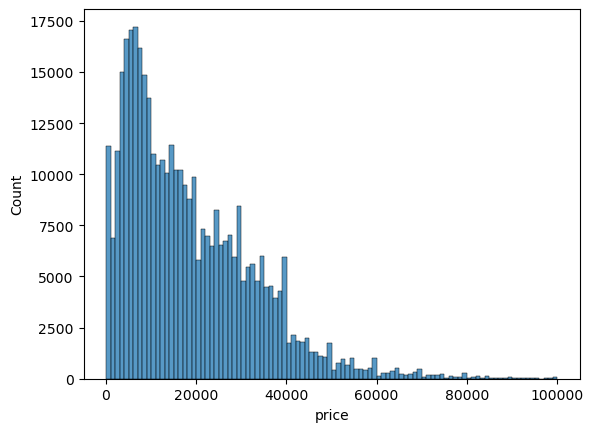

In [23]:
sns.histplot(df['price'], bins = 100)

The histrogram displays a skewed distribution where there are a lot of lower vehicle prices 
compared to higher priced vehicles. Majority of vehicles are priced between 
$10000 and $60000, with a few outliers that are priced around $100000. 

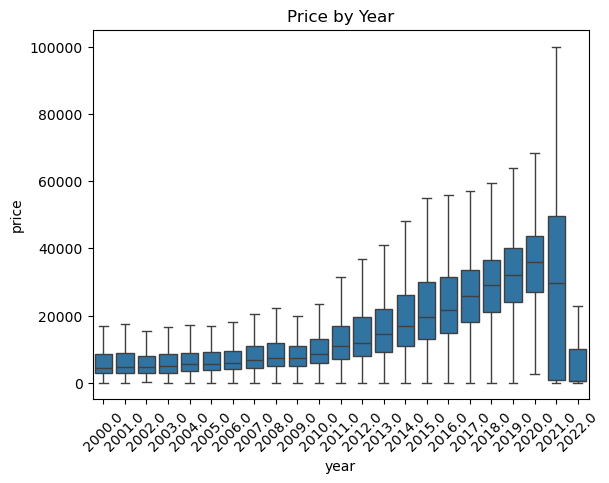

In [81]:
recentyears = df[df['year'] >=2000]
sns.boxplot(x='year', y='price', data = recentyears, showfliers=False)
plt.title("Price by Year")
plt.xticks(rotation=45)
plt.show()

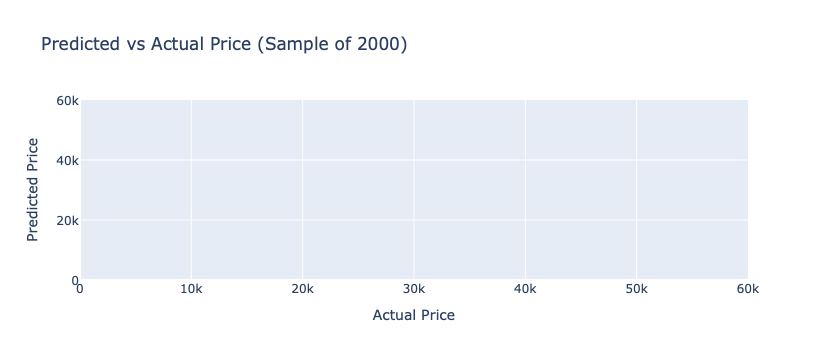

In [99]:
sample_idx = np.random.choice(len(y_test), size = 2000, replace=False)
fig = px.scatter(x = y_test.iloc[sample_idx], y = y_pred[sample_idx], labels = {"x": "Actual Price", "y": "Predicted Price"},
                 title = "Predicted vs Actual Price (Sample of 2000)",
                 opacity = 0.4, trendline = "ols")

fig.update_xaxes(range =[0,60000])
fig.update_yaxes(range = [0, 60000])
fig.show()


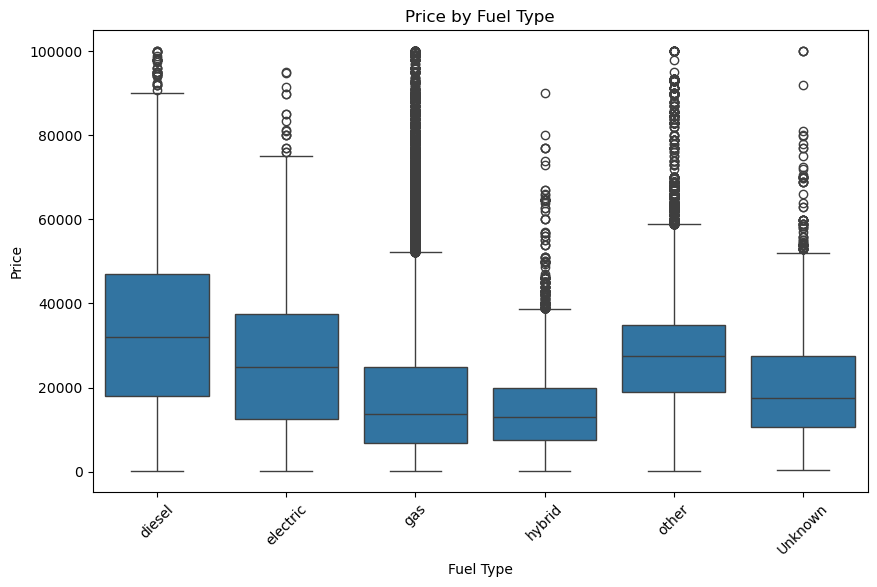

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(x="fuel", y="price", data = df)
plt.title("Price by Fuel Type")
plt.ylabel("Price")
plt.xlabel("Fuel Type")
plt.xticks(rotation=45)
plt.show()

In [45]:
print(df.shape)
print(X.shape, y.shape)
print(y.min(), y.max())


(390003, 14)
(390003, 13) (390003,)
100.0 100000.0


In [49]:
#inspecting coeffs
coefs = pd.Series(linreg.coef_, index=X_enc.columns)
print(coefs.sort_values(ascending=False).head())
print(coefs.sort_values().head())

manufacturer_tesla         12309.957031
condition_new              12125.861328
manufacturer_porsche       10576.584961
manufacturer_alfa-romeo     7509.164551
transmission_other          7408.093750
dtype: float32
fuel_gas        -12105.401367
fuel_electric   -11801.253906
fuel_hybrid     -11614.220703
fuel_Unknown     -9609.370117
fuel_other       -9517.509766
dtype: float32


Positive coefficients indicate that, while holding all else constant, the list of features
(manufacturer_tesla, condition_new, manufacturer_porsche, manufacturer_alfa-romeo, transmission_other)
are associated with an increase in price. 
Negative coefficients indicate that while holding all else constant, the list of features
(fuel_gas, fuel_electric, fuel_hybrid, fuel_Unknown, fuel_other)
Overall, the model suggests that newer cars and certain brands (Tesla) are more likely to increase 
price, where as certain vehicle features (gas, electric, etc) are likely to lower it.

Findings and Recommendations

Business Understanding:
The goal of this project is to understand which factors are more likely to influence
prices of cars at used car dealerships. By building a regression model, we are able to visualize and quantify the effect of price on vehicle.

Key Findings: 
The overall fit of the model explains around 45% of the variation in price. Most vehicles also sell between $5k-$40k, with a few outliers
that sell up to $100k. Luxary vehicle brands such as Tesla,  Porche,  and Alfa Romeo sell fro $7k-$13k above the baseline price for other cars. In addition, new cars or cars in newer condition add an extra $12k to the basline price. 

The factors linked to lower prices include gas, electric and hybrid powered vehicles, with those vehicles     
sold at a price $9,000-$12,000 below the basline group. Lastly, vehicles which are missing fuel information 
are also priced the same range below the baseline.

Based on these descriptions, newer vehicles and higher end brand vehicles retain the most value to 
car dealerships, while missing fuel information and car type lose the most value.
                                                                
Next Steps and Recommendations:
To ensure a more accurate effect of various features on price, including additional features such as 
mileage, accident history, etc could provide more information on the price variance.
Alternative models such as ridge regression may capture a possible non linear effect, which would also explain the variance in prices. 
Taking market conditions into consideration, could also explain economic factors that would definitely impact the price of the car, luxary or not. 